# Statistics in Machine Learning 4 - Probability Distributions

## 🔹 Lesson 1: Why We Model Data with Distributions

Let’s begin with a question:

> Imagine you’re analyzing people’s daily commute times.
Some take 5 minutes, some 20, some 60 — the numbers vary.
Why might it be useful to model this data with a “distribution”?

Think about it — what could a distribution tell you that a single average (like “the mean commute is 30 minutes”) cannot?

A distribution indeed tells us how many data points fall into each category or range.
In other words, it shows the pattern of frequencies — how the data are spread out.

Let’s build on that idea:
- If you only know the mean, you know the center.
- If you also know the distribution, you know how the data are shaped —
e.g. are most commutes short, or are there a few very long ones?

Here’s a simple way to say it:
> A probability distribution describes how likely each possible outcome is.

If we toss a fair die, what does the distribution look like?
(Think: how many outcomes, and what are their probabilities?)

But let’s picture the die again:
- A fair die has 6 faces, numbered 1 through 6.
- Each face is equally likely.

So — if all outcomes are equally likely, what’s the probability of any single face showing up?

Each face (1, 2, 3, 4, 5, or 6) has a probability of

$$\frac{1}{6} \approx 0.167$$
	​
and if you add them all up → $6 \times \frac{1}{6} = 1$


That’s a perfect example of a uniform distribution, because:
- Every outcome is equally likely,
- The probability is the same for all possible values.

Real-world data, like commute times, almost never spread out evenly.
Some values (like 20–40 minutes) happen more often, while others (like 90 minutes) are rare.

That’s where other types of distributions come in — they help describe how data cluster and taper off.

Here’s our roadmap from here:
1. Uniform distribution → all outcomes equally likely (you already got this).
2. Normal distribution → most values near the mean, fewer at the extremes.
3. Binomial distribution → counts of “success/failure” events (like flipping coins).

## 🔹 The Normal Distribution — Our Benchmark

Let’s start with an image in your mind:
- Picture a bell-shaped curve.
- Most data points cluster around the middle, and the frequency drops off symmetrically toward the sides.

That shape is the Normal distribution (also called Gaussian).

| Concept                    | Meaning in Normal Distribution                    |
| -------------------------- | ------------------------------------------------- |
| **Mean (μ)**               | The center of the bell — most values cluster here |
| **Standard deviation (σ)** | Controls the **spread** or **width** of the bell  |
| **Skewness**               | = 0 → perfectly symmetrical                       |
| **Kurtosis**               | = 3 (mesokurtic) → tails neither heavy nor light  |

So, when data roughly form this bell shape, we can use powerful statistical tools — like z-scores, probabilities, and confidence intervals.

Human height is one of the classic examples of a Normal distribution.

Most people cluster around the average height, and as you move away — say, much shorter or much taller — the frequency drops sharply and symmetrically.

That’s why the bell shape fits so well.

It’s called the Empirical Rule (or 68–95–99.7 rule):

| Range      | % of data in Normal distribution |
| ---------- | -------------------------------- |
| **μ ± 1σ** | ≈ **68%**                        |
| **μ ± 2σ** | ≈ **95%**                        |
| **μ ± 3σ** | ≈ **99.7%**                      |


Let’s look at how the Normal, Uniform, and Binomial distributions differ — not just in shape, but in what kind of randomness they describe.

🔹 1. Uniform Distribution

- Shape: Flat (every outcome equally likely)
- Example: Rolling a fair die, random number from 0–1
- Key idea: No clustering; everything is equally common

🔹 2. Normal Distribution

- Shape: Bell curve — highest at the mean, symmetric tails
- Example: Heights, IQ scores, measurement errors
- Key idea: Most values near average, few extremes

🔹 3. Binomial Distribution

- Shape: Discrete bars (counts of successes), roughly bell-shaped when large n
- Example: Number of heads in 10 coin flips
- Key idea: Probability of successes across fixed trials

| Situation               | Likely Model | Why                                    |
| ----------------------- | ------------ | -------------------------------------- |
| Random number generator | Uniform      | All outcomes equal                     |
| Heights of students     | Normal       | Natural variation clusters around mean |
| Coin toss results       | Binomial     | Only two outcomes each trial           |


If you were studying email spam detection, which of these distributions might you expect for
(a) the length of emails, and
(b) the number of spam words in an email?

(A) Length of emails → Normal distribution
- ✅ Correct.
- Email lengths cluster around an average — most are moderate length, while very short or very long emails are rarer.
- (In practice, it might not be perfectly normal, but the idea holds.)

(B) Number of spam words → Binomial distribution
- ✅ Also correct.
- Each word in an email can be seen as a trial (spam word or not),
- and we count the number of successes (spam words) across all words — exactly what Binomial models.

So far, you’ve:
- Understood what distributions are,
- Seen the differences among uniform, normal, and binomial,
- Tied them to real-world examples.

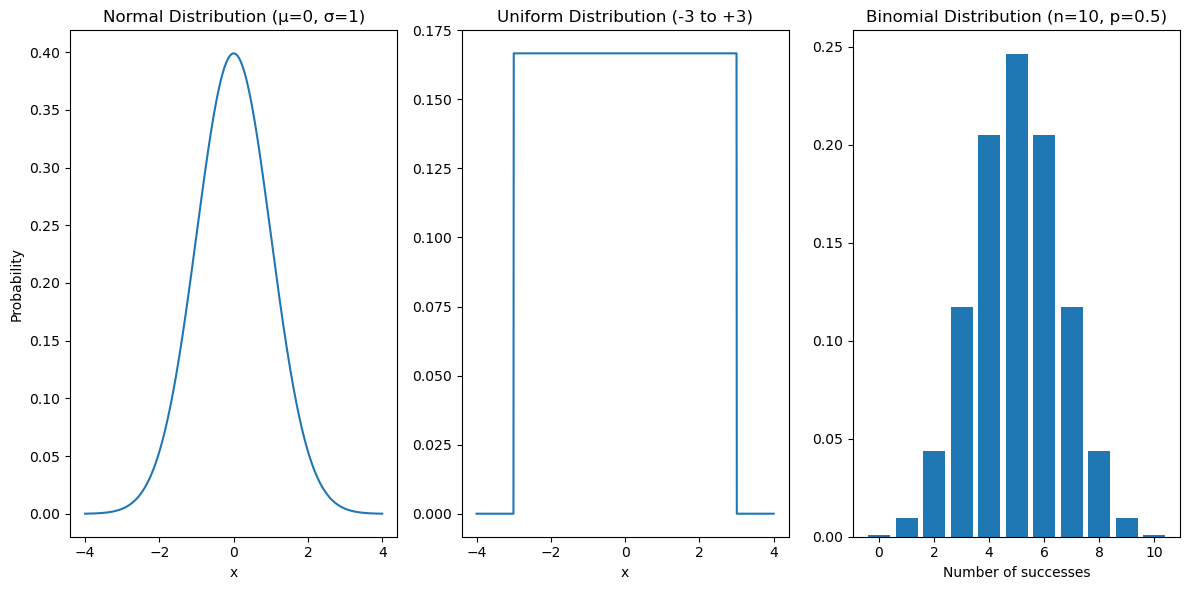

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, binom

# Create data
x = np.linspace(-4, 4, 1000)

# 1. Normal Distribution
normal_y = norm.pdf(x, loc=0, scale=1)

# 2. Uniform Distribution
uniform_y = uniform.pdf(x, loc=-3, scale=6)  # from -3 to +3

# 3. Binomial Distribution
n, p = 10, 0.5
x_binom = np.arange(0, n+1)
binom_y = binom.pmf(x_binom, n, p)

# Plot
plt.figure(figsize=(12, 6))

# Normal
plt.subplot(1, 3, 1)
plt.plot(x, normal_y)
plt.title("Normal Distribution (μ=0, σ=1)")
plt.xlabel("x"); plt.ylabel("Probability")

# Uniform
plt.subplot(1, 3, 2)
plt.plot(x, uniform_y)
plt.title("Uniform Distribution (-3 to +3)")
plt.xlabel("x")

# Binomial
plt.subplot(1, 3, 3)
plt.bar(x_binom, binom_y)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of successes")

plt.tight_layout()
plt.show()


### 🔹 The Central Limit Theorem (CLT)
💡 The big idea:
> When you combine (or average) many random effects, their sum tends to follow a Normal distribution — even if the original data weren’t Normal.

🧠 Intuitive example

Imagine measuring daily commute time:

It’s affected by many small, independent factors:
traffic lights, weather, walking speed, bus delay, etc.

Each factor adds a little random variation — some make the time longer, some shorter.

When you add up these small, independent effects →
their total (the commute time) tends to form a bell-shaped curve — the Normal distribution.

That’s why:

Heights, IQ, exam scores, blood pressure, measurement errors, etc.
all end up approximately Normal in large populations.